C:\Users\Azeez\AppData\Local\Temp\ipykernel_9356\281112843.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_churn = churn_df.groupby(pd.Grouper(key='date_joined', freq='M'))['churned'].mean()


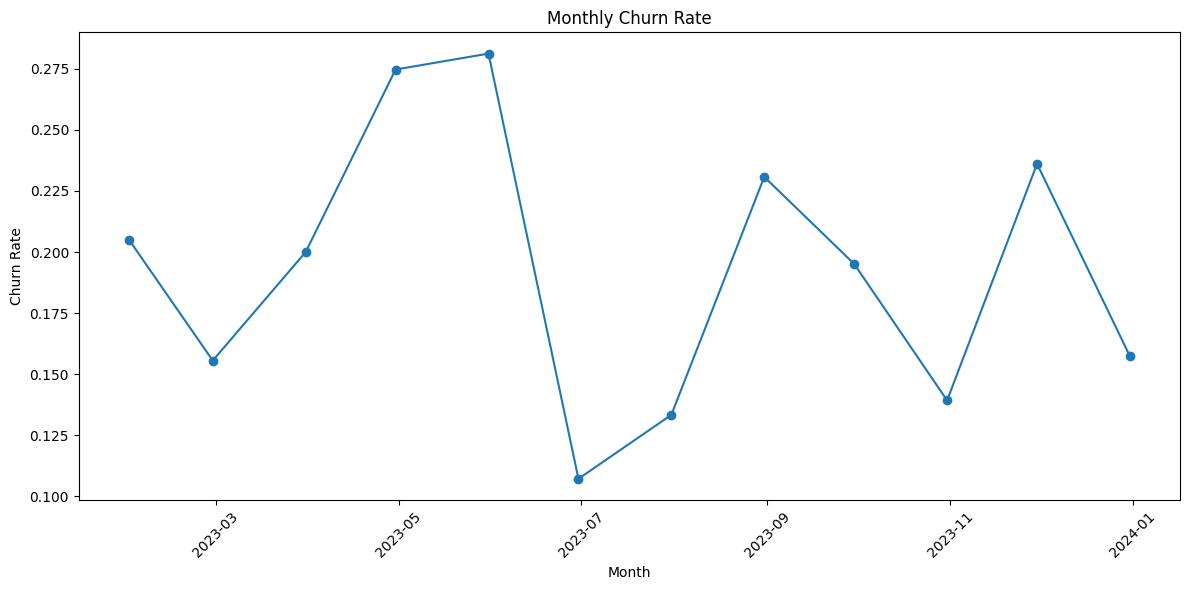

C:\Users\Azeez\AppData\Local\Temp\ipykernel_9356\281112843.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cumulative_customers = churn_df.groupby(pd.Grouper(key='date_joined', freq='M'))['customer_id'].count().cumsum()


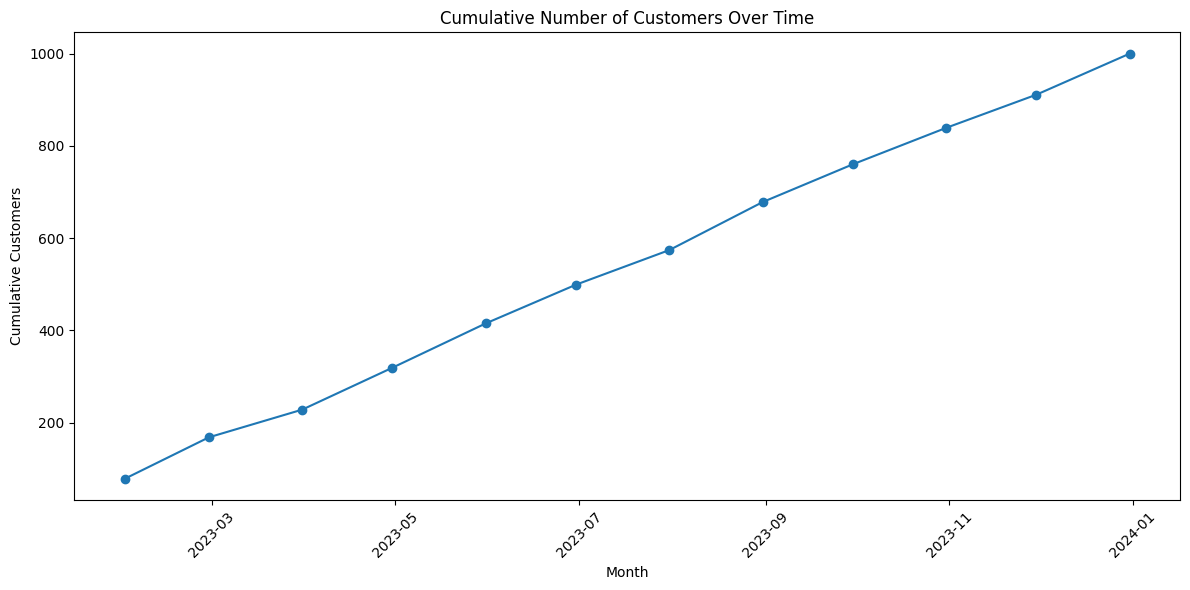

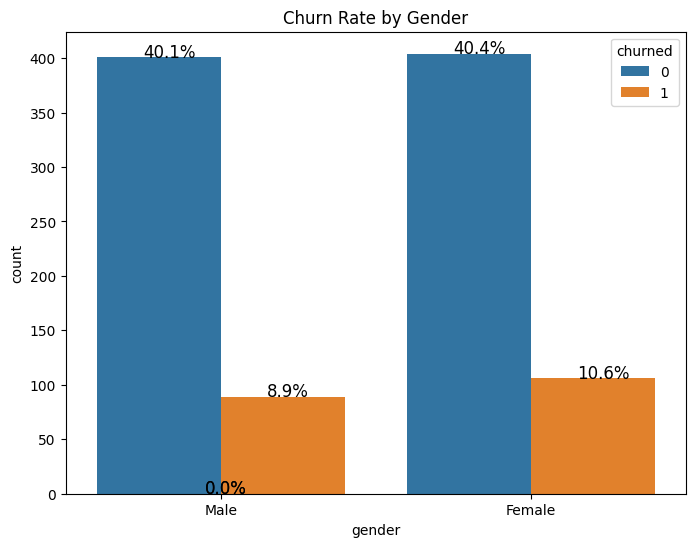

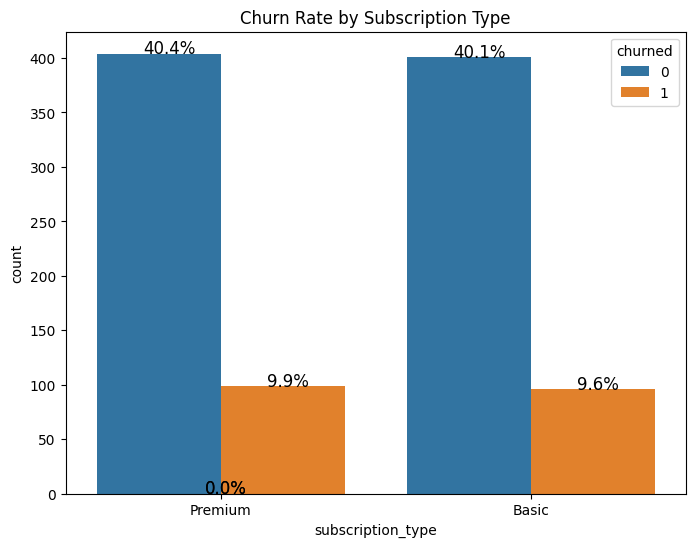

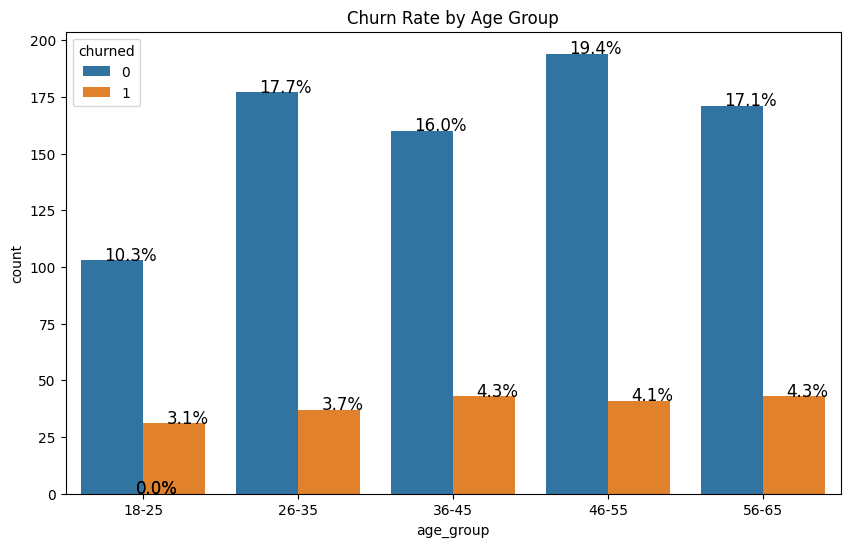

Visualization Complete


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------- 1. Load and Prepare Data -----------------------
try:
    churn_df = pd.read_csv("customer_data.csv")
    churn_df['date_joined'] = pd.to_datetime(churn_df['date_joined'])
except FileNotFoundError:
    print("Error: customer_data.csv not found")
    exit()  # Stop execution if the file is missing

# ----------------------- 2. Overall Churn Trend -----------------------

# Monthly Churn Rate
monthly_churn = churn_df.groupby(pd.Grouper(key='date_joined', freq='M'))['churned'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_churn.index, monthly_churn.values, marker='o')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Cumulative Number of Customers (Code is not correct)
cumulative_customers = churn_df.groupby(pd.Grouper(key='date_joined', freq='M'))['customer_id'].count().cumsum()
plt.figure(figsize=(12, 6))
plt.plot(cumulative_customers.index, cumulative_customers.values, marker='o')
plt.title('Cumulative Number of Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------- 3. Churn by Customer Segment -----------------------

# Function to add percentage labels to bar plots
def add_percentage_labels(ax, total):
    """Adds percentage labels to the bars in a countplot."""
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

# Churn Rate by Gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='churned', data=churn_df)
plt.title('Churn Rate by Gender')
total = len(churn_df['gender'])
add_percentage_labels(ax, total)
plt.show()

# Churn Rate by Subscription Type
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='subscription_type', hue='churned', data=churn_df)
plt.title('Churn Rate by Subscription Type')
total = len(churn_df['subscription_type'])
add_percentage_labels(ax, total)
plt.show()

# Churn Rate by Age Group
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
churn_df['age_group'] = pd.cut(churn_df['age'], bins=bins, labels=labels, right=False) #Create the bins

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age_group', hue='churned', data=churn_df)
plt.title('Churn Rate by Age Group')
total = len(churn_df['age_group'])
add_percentage_labels(ax, total)
plt.show()

# ----------------------- 4. Churn by Engagement and Behavior -----------------------
#Create another data set for this

# Print data
print("Visualization Complete")